In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/df_150.csv')

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance_variables(df, threshold=0.8):
    # Instantiate the VarianceThreshold with the desired threshold
    selection = VarianceThreshold(threshold=threshold * (1 - threshold))

    # Fit and transform the DataFrame using VarianceThreshold
    df_filtered = selection.fit_transform(df)

    # Create a new DataFrame using the filtered data
    df_filtered = pd.DataFrame(df_filtered, columns=df.columns[selection.get_support()])

    return df_filtered

# Assuming you have a DataFrame named 'data' containing your data
# Replace this with your actual DataFrame containing the data
# For example:
# data = pd.read_csv('your_dataset.csv')

# Call the function to remove low variance columns
filtered_data = remove_low_variance_variables(df1)

In [ ]:
filtered_data.shape
print(filtered_data)

         Name  PubchemFP3  PubchemFP16  PubchemFP20  PubchemFP33  \
0    51034309           0            1            1            0   
1    50243232           1            0            1            1   
2    51093506           0            0            1            0   
3    51034107           0            1            1            0   
4    50628270           1            1            1            0   
..        ...         ...          ...          ...          ...   
127  51093512           1            0            1            1   
128    201944           0            0            0            1   
129  51093514           0            0            1            0   
130  50837032           0            0            0            1   
131  50844478           0            1            0            0   

     PubchemFP143  PubchemFP145  PubchemFP146  PubchemFP150  PubchemFP180  \
0               0             0             0             0             0   
1               0            

In [ ]:
df2 = pd.read_csv('/content/bioactivity_data_pIC50.csv')
print(df2)
selection = ['Name','pIC50']
df2 = df2[selection]
df2

     Unnamed: 0      Name                                      Ligand SMILES  \
0             0  50243232  CC(C)C[C@H](NC(=O)N1CCOCC1)C(=O)N[C@@H](CCc1cc...   
1             1  51034309  CC(C)C[C@H](NC(=O)[C@H]1O[C@@H]1C(O)=O)C(=O)NC...   
2             2  51093506  OCC(=O)[C@H](CCc1ccccc1)NC(=O)[C@@H]1C[C@@H](O...   
3             3  51034107  CC(C)C[C@H](NC(=O)[C@H]1O[C@@H]1C(O)=O)C(=O)NC...   
4             4  51255016  OC(=O)C(F)(F)F.COC1=CC(=O)N([C@H]1Cc1c[nH]c2cc...   
..          ...       ...                                                ...   
127         127  51093512  CC(=O)OCC(=O)[C@H](CCc1ccccc1)NC(=O)C1(CCSCC1)...   
128         128  51093514  OCC(=O)[C@H](CCc1ccccc1)NC(=O)[C@@H]1Cc2ccccc2...   
129         129    201944  NC(=O)CCc1sc(NC(=O)CSCCCc2ccccc2)nc1\C=C\c1ccccc1   
130         130  50837032           Clc1ccc(CS(=O)(=O)Cc2nc(no2)-c2ccsc2)cc1   
131         131  50844478  O=C(CN1C(=O)C(=NNC(=O)c2ccncc2)c2ccccc12)Nc1cc...   

        class       MW    LogP  NumHDon

,Name,pIC50
0,50243232,7.677781
1,51034309,7.455932
2,51093506,7.221849
3,51034107,7.124939
4,51255016,7.102373
...,...,...
127,51093512,4.301030
128,51093514,4.301030
129,201944,4.258061
130,50837032,4.247184


In [ ]:
df3 = filtered_data.merge(df2, on='Name', how='outer')
df3.shape
print(df3)
df3.to_csv('df_146_f.csv')

         Name  PubchemFP3  PubchemFP16  PubchemFP20  PubchemFP33  \
0    51034309           0            1            1            0   
1    50243232           1            0            1            1   
2    51093506           0            0            1            0   
3    51034107           0            1            1            0   
4    50628270           1            1            1            0   
..        ...         ...          ...          ...          ...   
127  51093512           1            0            1            1   
128    201944           0            0            0            1   
129  51093514           0            0            1            0   
130  50837032           0            0            0            1   
131  50844478           0            1            0            0   

     PubchemFP143  PubchemFP145  PubchemFP146  PubchemFP150  PubchemFP180  \
0               0             0             0             0             0   
1               0            

In [ ]:
import pandas as pd
# Separate the target variable (y) from the features (X)
X = df3.iloc[:, :-1]  # Select all columns except the last one as features
y = df3.iloc[:, -1]   # Select the last column as the target variable

# Removing the first two columns from 'X'
X = X.drop(X.columns[:1], axis=1)
# Print the updated DataFrames
print("Features (X):")
print(X)

print("\nTarget variable (y):")
print(y)


Features (X):
     PubchemFP3  PubchemFP16  PubchemFP20  PubchemFP33  PubchemFP143  \
0             0            1            1            0             0   
1             1            0            1            1             0   
2             0            0            1            0             1   
3             0            1            1            0             0   
4             1            1            1            0             0   
..          ...          ...          ...          ...           ...   
127           1            0            1            1             0   
128           0            0            0            1             1   
129           0            0            1            0             0   
130           0            0            0            1             1   
131           0            1            0            0             1   

     PubchemFP145  PubchemFP146  PubchemFP150  PubchemFP180  PubchemFP181  \
0               0             0             

In [ ]:
X.shape

(132, 145)

In [ ]:
y.shape

(132,)

In [ ]:
X = X.iloc[:, [9, 10, 12, 18, 19, 24, 30, 36, 37, 80, 87, 91, 94, 97, 99, 109, 111, 116, 126, 142, 144]].copy()


In [ ]:
X

,PubchemFP181,PubchemFP186,PubchemFP193,PubchemFP335,PubchemFP338,PubchemFP357,PubchemFP376,PubchemFP383,PubchemFP385,PubchemFP536,...,PubchemFP553,PubchemFP569,PubchemFP576,PubchemFP579,PubchemFP611,PubchemFP615,PubchemFP633,PubchemFP659,PubchemFP712,PubchemFP821
0,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,1,0,1,0,0
1,1,1,0,1,1,0,0,1,0,1,...,0,1,0,1,1,1,0,1,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,1,0,0
3,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,1,0,1,0,0
4,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,1,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,0,0,0
128,0,1,0,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
129,1,1,1,0,1,0,0,0,0,1,...,0,1,0,1,1,0,1,0,1,0
130,0,0,0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have pandas DataFrame 'df' with features (except target) and 'y' (target variable) after processing the data
# Replace this with your actual DataFrame containing the data

# Extract the features 'X' and the target 'y' from the DataFrame
X = X
y = y

# Normalize the target variable 'y'
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to build the ANN model
def build_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output layer with 1 neuron for regression tasks
    model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
    return model

# Perform K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = []
cv_rmse_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build and train the ANN model for each fold
    model = build_ann_model((X_train_scaled.shape[1],))
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on the validation set for the fold
    y_val_pred = model.predict(X_val_fold)
    r2_val = r2_score(y_val_fold, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    cv_r2_scores.append(r2_val)
    cv_rmse_scores.append(rmse_val)

# Train the final model on the full training set
final_model = build_ann_model((X_train_scaled.shape[1],))
final_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the final model on the test set
y_test_pred = final_model.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the cross-validation and test results
print("Cross-validation R2 scores:", cv_r2_scores)
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean Cross-validation R2:", np.mean(cv_r2_scores))
print("Test set R2 score:", test_r2)
print("Test set RMSE:", test_rmse)


1/1 [==============================] - 0s 57ms/step
Cross-validation R2 scores: [0.7774198554388887, 0.6859436652543189, 0.5680046478609329, 0.39056719783883065, 0.4013678146091284]
Cross-validation RMSE scores: [0.4265201742694571, 0.5200158568461176, 0.48780459945818216, 0.7679673437384026, 0.9906708517438856]
Mean Cross-validation R2: 0.56466063620042
Test set R2 score: 0.7141834561056137
Test set RMSE: 0.5031345218075591


In [ ]:
new_X = pd.read_csv('new_df.csv')
import pandas as pd

# Step 1: Extract column names from df1
selected_columns = X_train.columns

# Step 2: Select the columns in df2 based on the column names from df1
new_X = new_X[selected_columns]

# Step 3: Reorder the columns in df2 to match the order of columns in df1
new_X = new_X[sorted(selected_columns)]

new_data_scaled = scaler.transform(new_X)
# Use the final_model to predict the target values for the new dataset
y_new_pred = final_model.predict(new_data_scaled)
# Inverse transform the predicted target values to get the original scale
y_new_pred_original_scale = scaler_y.inverse_transform(y_new_pred)

# y_new_pred_original_scale contains the predicted target values for the new dataset
print(y_new_pred_original_scale)


1/1 [==============================] - 0s 21ms/step
[[4.7443895]
 [5.3622823]
 [4.578684 ]
 [5.3622823]
 [5.5299573]
 [5.3622823]
 [4.618038 ]
 [4.395113 ]
 [4.493838 ]
 [4.465551 ]
 [5.3622823]
 [4.6768193]
 [5.5299573]
 [5.7619495]
 [5.17383  ]
 [4.7443895]
 [5.2573028]
 [4.921511 ]]


In [ ]:
print(new_X)

    PubchemFP181  PubchemFP186  PubchemFP193  PubchemFP335  PubchemFP338  \
0              0             0             0             0             1   
1              1             0             0             0             1   
2              1             0             0             1             0   
3              1             0             0             0             1   
4              1             0             0             0             1   
5              1             0             0             0             1   
6              0             0             0             0             1   
7              0             0             0             1             1   
8              0             0             0             0             1   
9              0             0             0             0             1   
10             1             0             0             0             1   
11             0             0             0             0             1   
12          

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut

# Assuming you have pandas DataFrame 'df' with features (except target) and 'y' (target variable) after processing the data
# Replace this with your actual DataFrame containing the data

# Extract the features 'X' and the target 'y' from the DataFrame
X = X
y = y

# Normalize the target variable 'y'
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to build the ANN model
def build_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output layer with 1 neuron for regression tasks
    model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
    return model

# Perform Leave-One-Out cross-validation
loo = LeaveOneOut()
y_pred_loo = []
mse_loo = []

for train_index, val_index in loo.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y_normalized[train_index], y_normalized[val_index]

    # Build and train the ANN model for each fold
    model = build_ann_model((X_scaled.shape[1],))
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on the validation set for the fold
    y_val_pred = model.predict(X_val_fold)
    y_pred_loo.append(y_val_pred[0, 0])  # Append the predicted value for the left-out sample

    # Calculate Mean Squared Error (MSE) for the fold
    mse_fold = mean_squared_error(y_val_fold, y_val_pred)
    mse_loo.append(mse_fold)

# Convert the lists to NumPy arrays
y_pred_loo = np.array(y_pred_loo)
mse_loo = np.array(mse_loo)

# Calculate the R-squared and Mean MSE for LOO cross-validation
r2_loo = r2_score(y_normalized, y_pred_loo)
mean_mse_loo = mse_loo.mean()

print("R-squared for LOO Cross-Validation:", r2_loo)
print("Mean MSE for LOO Cross-Validation:", mean_mse_loo)


1/1 [==============================] - 0s 58ms/step
R-squared for LOO Cross-Validation: 0.5725895713292262
Mean MSE for LOO Cross-Validation: 0.4274104286707739


1/1 [==============================] - 0s 25ms/step


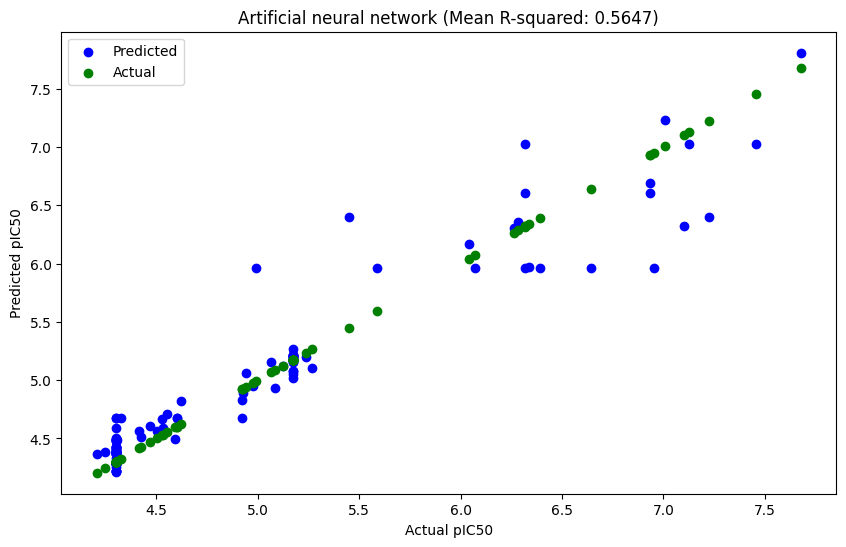

In [ ]:
import matplotlib.pyplot as plt

# Use the final model to predict target variable for the training and test sets
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

# Inverse transform the normalized predicted values to their original scale
y_train_pred_original = scaler_y.inverse_transform(y_train_pred)
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)

# Inverse transform the normalized actual values back to their original scale
y_train_original = scaler_y.inverse_transform(y_train)
y_test_original = scaler_y.inverse_transform(y_test)

# Create the scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(y_train_original, y_train_pred_original, color='blue', label='Predicted')
#plt.scatter(y_test_original, y_test_pred_original, color='red', label='Test Predicted')
plt.scatter(y_train_original, y_train_original, color='green', label='Actual')
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title(f'Artificial neural network (Mean R-squared: {np.mean(cv_r2_scores):.4f})')
plt.legend()
plt.show()